# Labelling Recipes Stage
**Sharon Marfatia**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
fifty_cutoff = 191.12
# is the overall baseline supposed to be the GHG_baseline?
overall_baseline = 382.25

GHG_baseline = 382.25
nitrogen_baseline = 3.86
water_baseline = 1248.19
land_baseline = 0.93

In [3]:
# CHANGE THIS AS NEEDED:
restaurant_name = "OK23-24"

In [4]:
def create_ghg_label(label):
    # determine the GHG label based on the given label value and predefined cutoffs
    if label > overall_baseline:
        # if the label value is > than overall baseline, assign "Red" label
        return "Red"
    elif (label <= overall_baseline) & (label > fifty_cutoff):
        # if the label value is between overall baseline and fifty_cutoff, assign "Yellow" label
        return "Yellow"
    elif label <= fifty_cutoff:
        # if the label value is less than or equal to the fifty_cutoff, assign "Green" label
        return "Green"


In [5]:
def create_results_all_factors(df):
    # create a Combined Label based on different factors for each row in the DataFrame
    df["Combined Label"] = ""

    # add another parameter: n so that change the number of factors instead of multiplying by 3

    def calculate_all_factors(ghg, nitrogen, water, land):
        # calculate the combined label value based on the given factors
        weighted_ghg = ghg / (4 * GHG_baseline)
        weighted_nitrogen = nitrogen / (4 * nitrogen_baseline)
        weighted_water = water / (4 * water_baseline)

        # most recently added
        weighted_land = land / (4 * land_baseline)

        return weighted_ghg + weighted_nitrogen + weighted_water + weighted_land


    for ind, row in df.iterrows():
        # iterate over each row in the DataFrame and calculate the combined label
        label = calculate_all_factors(row["GHG Emission (g) / 100g"], row["N lost (g) / 100g"],
                                      row["Stress-Weighted Water Use (L) / 100g"],
                                      row['Land Use (m^2) / 100g'])

        if label <= 0.5:
            # if the label value is less than or equal to 0.5, assign "Green" label
            df.loc[ind, "Combined Label"] = "Green"
        elif label >= 1:
            # if the label value is greater than or equal to 1, assign "Red" label
            df.loc[ind, "Combined Label"] = "Red"
        elif (label > 0.5) or (label < 1):
            # if the label value is between 0.5 and 1, assign "Yellow" label
            df.loc[ind, "Combined Label"] = "Yellow"
    return df


In [6]:
def add_menu_names(df, dict):
    # add menu names to the DataFrame based on a dictionary
    df["Displayed Name"] = ""
    menu_name = list(dict.keys())
    menu_ID = list(dict.values())
    for ind, row in df.iterrows():
        searchID = row["ProdId"]
        if searchID in menu_ID:
            # if the product ID is found in the menu_ID list, retrieve the corresponding name
            position = menu_ID.index(searchID)
            name = menu_name[position]
            df.loc[ind, "Displayed Name"] = name
        else:
            continue
    name_col = df.pop("Displayed Name")
    df.insert(0, "Displayed Name", name_col)
    df = df.dropna(subset=["Displayed Name"])

    df_temp = df["Displayed Name"].str.split("|", expand=True)
    df["Category"] = df_temp[0]
    df["Displayed Name"] = df_temp[1]
    name_col2 = df.pop("Category")
    df.insert(0, "Category", name_col2)
    # returns the modified DataFrame with the added "Category" and "Displayed Name" columns
    return df


In [7]:
def create_final_counts(df):
    # create final counts of GHG and combined labels from DataFrame

    # count the occurrences of GHG Only labels
    ghg_red = df["GHG Only Label"].value_counts()["Red"]
    ghg_yellow = df["GHG Only Label"].value_counts()["Yellow"]
    ghg_green = df["GHG Only Label"].value_counts()["Green"]
    # count the occurrences of Combined labels
    all_red = df["Combined Label"].value_counts()["Red"]
    all_yellow = df["Combined Label"].value_counts()["Yellow"]
    all_green = df["Combined Label"].value_counts()["Green"]
    print(all_red, all_yellow, all_green)
    # create a dictionary to store the label counts
    data = {"GHG Label Counts": [ghg_red, ghg_yellow, ghg_green],
            "Combined Label Counts": [all_red, all_yellow, all_green]}
    # create a DataFrame from the label counts data and return it
    results = pd.DataFrame(data, index=["Red", "Yellow", "Green"])
    return results


In [8]:
def create_visualizations(df):
    df.reset_index(inplace=True)
    df = df.rename(columns={"index": "Color"})
    sns.set_theme(style="darkgrid")
    palette = {"Green": "tab:green", "Red": "tab:red", "Yellow": "tab:orange", "Sum": "tab:blue"}
    fig, axes = plt.subplots(1, 2, figsize=(7, 4), sharex=False, sharey=True)
    fig.suptitle("Emission Label Counts")
    ax1 = sns.barplot(data=df, x=df["Color"], y=df["GHG Label Counts"], ax=axes[0], palette=palette)
    ax1.set_title("GHG Emission Label")
    ax1.set_ylabel("Counts")
    ax1.set_xlabel("")
    ax2 = sns.barplot(data=df, x=df["Color"], y=df["Combined Label Counts"], ax=axes[1], palette=palette)
    ax2.set_title("Combined Emissions Label")
    ax2.set_ylabel("")
    ax2.set_xlabel("")
    fig.title = "Color Comparison"
    ax1.set_title = "GHG Emission Label Counts"
    ax2.set_title = "Combined Emissions Label Counts"
    ax2.set_ylabel = ""
    for ax in [ax1, ax2]:
        for i in ax.containers:
            ax.bar_label(i, )
    plt.tight_layout()
    plt.savefig("C:/Users/smvan/CFFS-S23/CFFS-22-23/data/final/2023_2024_CFFS_Outcomes/Summary_fig.png")
    plt.show()

In [9]:
def create_category_true(df):
    # create category columns for True values in the DataFrame

    # create empty columns for each category
    df["RED"] = ""
    df["YELLOW"] = ""
    df["GREEN"] = ""
    # iterate over each row in the DataFrame
    for ind, row in df.iterrows():
        # Check the value of the Combined Label column and assign "TRUE" to the corresponding category column
        if row["Combined Label"] == "Red":
            df.loc[ind, "RED"] = "TRUE"
        if row["Combined Label"] == "Yellow":
            df.loc[ind, "YELLOW"] = "TRUE"
        if row["Combined Label"] == "Green":
            df.loc[ind, "GREEN"] = "TRUE"
    # adds category columns for True values based on the Combined Label column
    return df


In [10]:
products = pd.read_csv('C:/Users/smvan/CFFS-S23/CFFS-22-23/data/preprocessed/Products_List.csv')

In [11]:
final = products.copy()
final

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,R-44511,FLX|CAL|Soup|Tortilla Chicken,OK - FLEX KITCHEN,388.000000,1228.402759,24.238125,3.430957,146.08,2879.54,316.60,6.25,37.65,742.15,0.88
1,R-28260,GLB|Soup|Beef Pho,OK - GLOBAL KITCHEN,338.500000,6121.497318,47.948283,18.283512,357.30,9230.04,1808.42,14.16,105.55,2726.75,5.40
2,R-35819,GLB|Soup|ChickenDumpling,OK - GLOBAL KITCHEN,715.000000,1368.736873,28.313328,2.580515,220.36,1683.20,191.43,3.96,30.82,235.41,0.36
3,R-50482,GLB|SOUP|Wor wonton,OK - SOUP,417.000000,1955.144544,20.803418,2.160149,125.79,3132.71,468.86,4.99,30.17,751.25,0.52
4,R-31955,SIDE|Soup|16oz,OK - SOUP,473.176000,0.000000,0.000000,0.000000,0.47,0.47,0.00,0.00,0.10,0.10,0.00
5,R-37630,SIDE|Soup|Miso,OK - SOUP,454.000000,92.157573,0.317005,0.217500,0.89,5.48,20.30,0.07,0.20,1.21,0.05
6,R-47565,SOUP|Tortilla,OK- VEGETARIAN KITCHEN FEATURE,704.000005,508.503878,3.753598,1.334324,97.96,3187.34,72.23,0.53,13.91,452.75,0.19
7,R-60569,TRUCK|GrilledCheese|Bacon Avo,OK - FOOD TRUCK(Food),280.000001,1864.540572,21.193008,3.212422,300.53,11626.12,665.91,7.57,107.33,4152.19,1.15
8,R-60558,TRUCK|Grl Cheese & Tom Soup|,OK - FOOD TRUCK(Food),661.000001,2270.235369,24.330537,3.741884,324.24,13649.76,343.45,3.68,49.05,2065.02,0.57
9,R-35651,TRUCK|Tomato Soup,OK - FOOD TRUCK(Food),381.000000,405.694797,3.137529,0.529462,23.71,2023.65,106.48,0.82,6.22,531.14,0.14


In [12]:
final["GHG Only Label"] = final["GHG Emission (g) / 100g"].apply(lambda x: create_ghg_label(x))
final

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g,GHG Only Label
0,R-44511,FLX|CAL|Soup|Tortilla Chicken,OK - FLEX KITCHEN,388.000000,1228.402759,24.238125,3.430957,146.08,2879.54,316.60,6.25,37.65,742.15,0.88,Yellow
1,R-28260,GLB|Soup|Beef Pho,OK - GLOBAL KITCHEN,338.500000,6121.497318,47.948283,18.283512,357.30,9230.04,1808.42,14.16,105.55,2726.75,5.40,Red
2,R-35819,GLB|Soup|ChickenDumpling,OK - GLOBAL KITCHEN,715.000000,1368.736873,28.313328,2.580515,220.36,1683.20,191.43,3.96,30.82,235.41,0.36,Yellow
3,R-50482,GLB|SOUP|Wor wonton,OK - SOUP,417.000000,1955.144544,20.803418,2.160149,125.79,3132.71,468.86,4.99,30.17,751.25,0.52,Red
4,R-31955,SIDE|Soup|16oz,OK - SOUP,473.176000,0.000000,0.000000,0.000000,0.47,0.47,0.00,0.00,0.10,0.10,0.00,Green
5,R-37630,SIDE|Soup|Miso,OK - SOUP,454.000000,92.157573,0.317005,0.217500,0.89,5.48,20.30,0.07,0.20,1.21,0.05,Green
6,R-47565,SOUP|Tortilla,OK- VEGETARIAN KITCHEN FEATURE,704.000005,508.503878,3.753598,1.334324,97.96,3187.34,72.23,0.53,13.91,452.75,0.19,Green
7,R-60569,TRUCK|GrilledCheese|Bacon Avo,OK - FOOD TRUCK(Food),280.000001,1864.540572,21.193008,3.212422,300.53,11626.12,665.91,7.57,107.33,4152.19,1.15,Red
8,R-60558,TRUCK|Grl Cheese & Tom Soup|,OK - FOOD TRUCK(Food),661.000001,2270.235369,24.330537,3.741884,324.24,13649.76,343.45,3.68,49.05,2065.02,0.57,Yellow
9,R-35651,TRUCK|Tomato Soup,OK - FOOD TRUCK(Food),381.000000,405.694797,3.137529,0.529462,23.71,2023.65,106.48,0.82,6.22,531.14,0.14,Green


In [13]:
final = create_results_all_factors(final)
final

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g,GHG Only Label,Combined Label
0,R-44511,FLX|CAL|Soup|Tortilla Chicken,OK - FLEX KITCHEN,388.000000,1228.402759,24.238125,3.430957,146.08,2879.54,316.60,6.25,37.65,742.15,0.88,Yellow,Yellow
1,R-28260,GLB|Soup|Beef Pho,OK - GLOBAL KITCHEN,338.500000,6121.497318,47.948283,18.283512,357.30,9230.04,1808.42,14.16,105.55,2726.75,5.40,Red,Red
2,R-35819,GLB|Soup|ChickenDumpling,OK - GLOBAL KITCHEN,715.000000,1368.736873,28.313328,2.580515,220.36,1683.20,191.43,3.96,30.82,235.41,0.36,Yellow,Yellow
3,R-50482,GLB|SOUP|Wor wonton,OK - SOUP,417.000000,1955.144544,20.803418,2.160149,125.79,3132.71,468.86,4.99,30.17,751.25,0.52,Red,Yellow
4,R-31955,SIDE|Soup|16oz,OK - SOUP,473.176000,0.000000,0.000000,0.000000,0.47,0.47,0.00,0.00,0.10,0.10,0.00,Green,Green
5,R-37630,SIDE|Soup|Miso,OK - SOUP,454.000000,92.157573,0.317005,0.217500,0.89,5.48,20.30,0.07,0.20,1.21,0.05,Green,Green
6,R-47565,SOUP|Tortilla,OK- VEGETARIAN KITCHEN FEATURE,704.000005,508.503878,3.753598,1.334324,97.96,3187.34,72.23,0.53,13.91,452.75,0.19,Green,Green
7,R-60569,TRUCK|GrilledCheese|Bacon Avo,OK - FOOD TRUCK(Food),280.000001,1864.540572,21.193008,3.212422,300.53,11626.12,665.91,7.57,107.33,4152.19,1.15,Red,Red
8,R-60558,TRUCK|Grl Cheese & Tom Soup|,OK - FOOD TRUCK(Food),661.000001,2270.235369,24.330537,3.741884,324.24,13649.76,343.45,3.68,49.05,2065.02,0.57,Yellow,Red
9,R-35651,TRUCK|Tomato Soup,OK - FOOD TRUCK(Food),381.000000,405.694797,3.137529,0.529462,23.71,2023.65,106.48,0.82,6.22,531.14,0.14,Green,Green


In [14]:
final.to_csv("C:/Users/smvan/CFFS-S23/CFFS-22-23/data/final/2023_2024_CFFS_Outcomes/Data_Labelled_"+restaurant_name+".csv", 
             index=False)
final.to_excel("C:/Users/smvan/CFFS-S23/CFFS-22-23/data/final/2023_2024_CFFS_Outcomes/Data_Labelled_"+restaurant_name+".xlsx", 
               sheet_name="Labels", index=False)

In [15]:
# CHANGE THE NAME AS NEEDED AS PER THE RESTAURANT:

OK_list = final.set_index('Description')['ProdId'].to_dict()
OK_list

{'FLX|CAL|Soup|Tortilla Chicken': 'R-44511',
 'GLB|Soup|Beef Pho': 'R-28260',
 'GLB|Soup|ChickenDumpling ': 'R-35819',
 'GLB|SOUP|Wor wonton': 'R-50482',
 'SIDE|Soup|16oz': 'R-31955',
 'SIDE|Soup|Miso': 'R-37630',
 'SOUP|Tortilla ': 'R-47565',
 'TRUCK|GrilledCheese|Bacon Avo': 'R-60569',
 'TRUCK|Grl Cheese & Tom Soup|': 'R-60558',
 'TRUCK|Tomato Soup': 'R-35651',
 'VEG|SOUP|Miso Dumpling ': 'R-35319',
 'VEG|SOUP|Tortilla ': 'R-35269',
 'VEG|SOUP|UBC Farms Pumpkin ': 'R-46574'}

In [16]:
final2 = final.copy()
final2 = add_menu_names(final, OK_list)
final2.to_csv("C:/Users/smvan/CFFS-S23/CFFS-22-23/data/final/2023_2024_CFFS_Outcomes/Data_Labelled_"+restaurant_name+"_with_name.csv",
                  index=False)
final2.to_csv("C:/Users/smvan/CFFS-S23/CFFS-22-23/data/final/2023_2024_CFFS_Outcomes/Data_Labelled_"+restaurant_name+"_with_name.xlsx",
                  index=False)

In [17]:
counts = create_final_counts(final2)
all_ghg_num = counts["GHG Label Counts"].sum()
all_num = counts["Combined Label Counts"].sum()
sum_row = pd.Series(data={"GHG Label Counts": all_ghg_num, "Combined Label Counts": all_num}, name="Sum")

3 3 7


In [18]:
counts = counts.append(sum_row, ignore_index=False)
counts.to_csv("C:/Users/smvan/CFFS-S23/CFFS-22-23/data/final/2023_2024_CFFS_Outcomes/"+restaurant_name+"_Summary.csv", index=False)
counts_print = pd.concat([counts, sum_row], ignore_index=True)
counts


# THERE ARE 5 SUM ROWS BECUASE THERE ARE 5 EMISSION FACTORS THAT WE ARE LOOKING AT: GHG, nitrogen, stressed water, fresh water
# and land use

C:\Users\smvan\AppData\Local\Temp\ipykernel_21592\3944149530.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts = counts.append(sum_row, ignore_index=False)


,GHG Label Counts,Combined Label Counts
Red,3,3
Yellow,3,3
Green,7,7
Sum,13,13


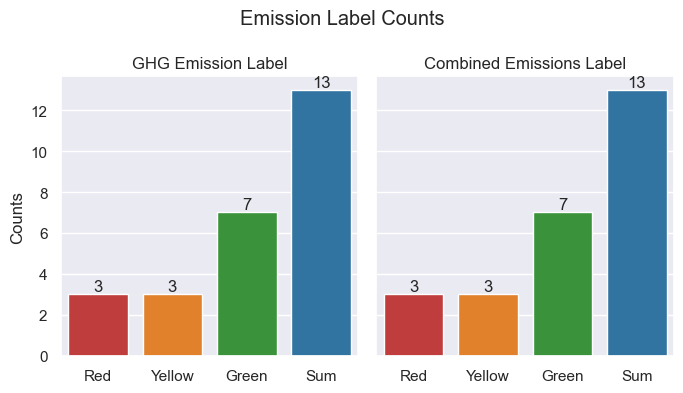

In [19]:
# THE BLUE BAR REPRESENTS THE SUM ROW WHICH IS THE TOTAL NUMBER OF RECIPES THAT HAVE BEEN ASSIGNED A LABEL
# EACH BAR REPRESENTS THE # OF RECIPES THAT WERE LABELLED WITH THAT SPECIFIC COLOUR

fig = create_visualizations(counts)
fig